In [1]:
!pip install google-cloud-bigquery
!pip install pyarrow

In [31]:
import os
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] ='cmpt733project-acc5de89927c.json'
from google.cloud import bigquery
import pandas as pd
import pyarrow
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

bigquery_client = bigquery.Client()

In [17]:
QUERY = """
SELECT 
*
from `gdelt-bq.gdeltv2.events`
where Year=2017 and
(Actor1Name='AFRICA' or Actor1Name='CANADA' or Actor1Name='UNITED STATES' or Actor1Name='CHINA')
limit 10000
"""

In [18]:
df0 = (
    bigquery_client.query(QUERY)
    .result()
    .to_dataframe()
)

C:\Anaconda3\lib\site-packages\google\cloud\bigquery\client.py:444: UserWarning: Cannot create BigQuery Storage client, the dependency google-cloud-bigquery-storage is not installed.
  warnings.warn(


In [19]:
df0.head(10)

,GLOBALEVENTID,SQLDATE,MonthYear,Year,FractionDate,Actor1Code,Actor1Name,Actor1CountryCode,Actor1KnownGroupCode,Actor1EthnicCode,...,ActionGeo_Type,ActionGeo_FullName,ActionGeo_CountryCode,ActionGeo_ADM1Code,ActionGeo_ADM2Code,ActionGeo_Lat,ActionGeo_Long,ActionGeo_FeatureID,DATEADDED,SOURCEURL
0,758541031,20170523,201705,2017,2017.3918,USAGOV,UNITED STATES,USA,None,None,...,2,"California, United States",US,USCA,None,36.1700,-119.7460,CA,20180523234500,http://hallmarknews.com/policy-shift-fallout-u...
1,758555396,20170524,201705,2017,2017.3945,USA,UNITED STATES,USA,None,None,...,1,Ghana,GH,GH,None,8.0000,-2.0000,GH,20180524003000,http://thenationonlineng.net/emem-isong-jerry-...
2,758593493,20170524,201705,2017,2017.3945,USA,UNITED STATES,USA,None,None,...,1,India,IN,IN,None,20.0000,77.0000,IN,20180524030000,https://www.mid-day.com/articles/jarred-kushne...
3,758637555,20170524,201705,2017,2017.3945,CHN,CHINA,CHN,None,None,...,1,Mexico,MX,MX,None,23.0000,-102.0000,MX,20180524070000,http://www.thenewstribune.com/news/business/ar...
4,758637556,20170524,201705,2017,2017.3945,CHN,CHINA,CHN,None,None,...,1,Canada,CA,CA,None,60.0000,-96.0000,CA,20180524070000,http://www.pahomepage.com/news/china-says-will...
5,758577682,20170524,201705,2017,2017.3945,USAGOV,UNITED STATES,USA,None,None,...,2,"Massachusetts, United States",US,USMA,None,42.2373,-71.5314,MA,20180524014500,http://capeandislands.org/post/massachusetts-c...
6,758560655,20170524,201705,2017,2017.3945,USA,UNITED STATES,USA,None,None,...,3,"Auburn University At Montgomery, Alabama, Unit...",US,USAL,None,32.3710,-86.1772,147692,20180524004500,http://www.wdam.com/story/38252580/special-rep...
7,758569923,20170524,201705,2017,2017.3945,USA,UNITED STATES,USA,None,None,...,4,"Jerusalem, Israel (general), Israel",IS,IS00,18315,31.7667,35.2333,-797092,20180524011500,http://www.gulf-times.com/story/593832/Iran-bl...
8,758569924,20170524,201705,2017,2017.3945,USA,UNITED STATES,USA,None,None,...,4,"Gaza, Israel (general), Israel",IS,IS00,18315,31.4167,34.3333,-797156,20180524011500,http://www.gulf-times.com/story/593832/Iran-bl...
9,758631131,20170524,201705,2017,2017.3945,USA,UNITED STATES,USA,None,None,...,3,"Hollywood, California, United States",US,USCA,CA037,34.0983,-118.3270,1660757,20180524063000,https://www.mamamia.com.au/brad-pitt-harvey-we...


In [26]:
# the dataframe df0 using google big query has data of the Country Events of 2017 year
# for USA, Canada, China and Africa

In [27]:
df0.describe()

,GLOBALEVENTID,SQLDATE,MonthYear,Year,FractionDate,IsRootEvent,QuadClass,GoldsteinScale,NumMentions,NumSources,...,Actor1Geo_Type,Actor1Geo_Lat,Actor1Geo_Long,Actor2Geo_Type,Actor2Geo_Lat,Actor2Geo_Long,ActionGeo_Type,ActionGeo_Lat,ActionGeo_Long,DATEADDED
count,1.000000e+04,1.000000e+04,10000.000000,10000.0,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,...,10000.000000,9992.000000,9992.000000,10000.000000,5986.000000,5986.000000,10000.000000,9992.000000,9992.000000,1.000000e+04
mean,6.920725e+08,2.017091e+07,201708.895600,2017.0,2017.696461,0.576400,1.73840,0.770610,3.764900,1.083400,...,2.606600,34.987834,-46.816272,1.549500,33.436032,-17.820815,2.641000,34.701155,-39.396843,2.017116e+13
std,1.060935e+07,6.151160e+01,0.625412,0.0,0.048619,0.494153,1.09594,4.619764,3.602877,0.591844,...,1.068808,16.383595,76.161456,1.596873,18.383325,84.024282,1.108982,17.048373,78.991616,1.494035e+09
min,6.902993e+08,2.017052e+07,201705.000000,2017.0,2017.391800,0.000000,1.00000,-10.000000,1.000000,1.000000,...,0.000000,-85.622100,-157.858000,0.000000,-51.700000,-161.001000,0.000000,-85.622100,-161.001000,2.017092e+13
25%,6.903447e+08,2.017092e+07,201709.000000,2017.0,2017.704100,0.000000,1.00000,-2.000000,2.000000,1.000000,...,2.000000,33.338600,-95.400200,0.000000,31.180100,-86.260400,2.000000,32.799000,-92.728225,2.017092e+13
50%,6.903857e+08,2.017092e+07,201709.000000,2017.0,2017.704100,1.000000,1.00000,1.900000,2.000000,1.000000,...,3.000000,38.895100,-77.036400,1.000000,38.511100,-71.000000,3.000000,38.895100,-77.036400,2.017092e+13
75%,6.904212e+08,2.017092e+07,201709.000000,2017.0,2017.704100,1.000000,2.00000,3.400000,4.000000,1.000000,...,3.000000,42.149700,2.333330,3.000000,41.850000,44.393900,4.000000,42.149700,26.100000,2.017092e+13
max,7.586978e+08,2.017092e+07,201709.000000,2017.0,2017.706800,1.000000,4.00000,10.000000,59.000000,14.000000,...,5.000000,80.733300,178.000000,5.000000,77.377500,178.000000,5.000000,75.000000,178.000000,2.018052e+13


In [28]:
df0.shape[0]

10000

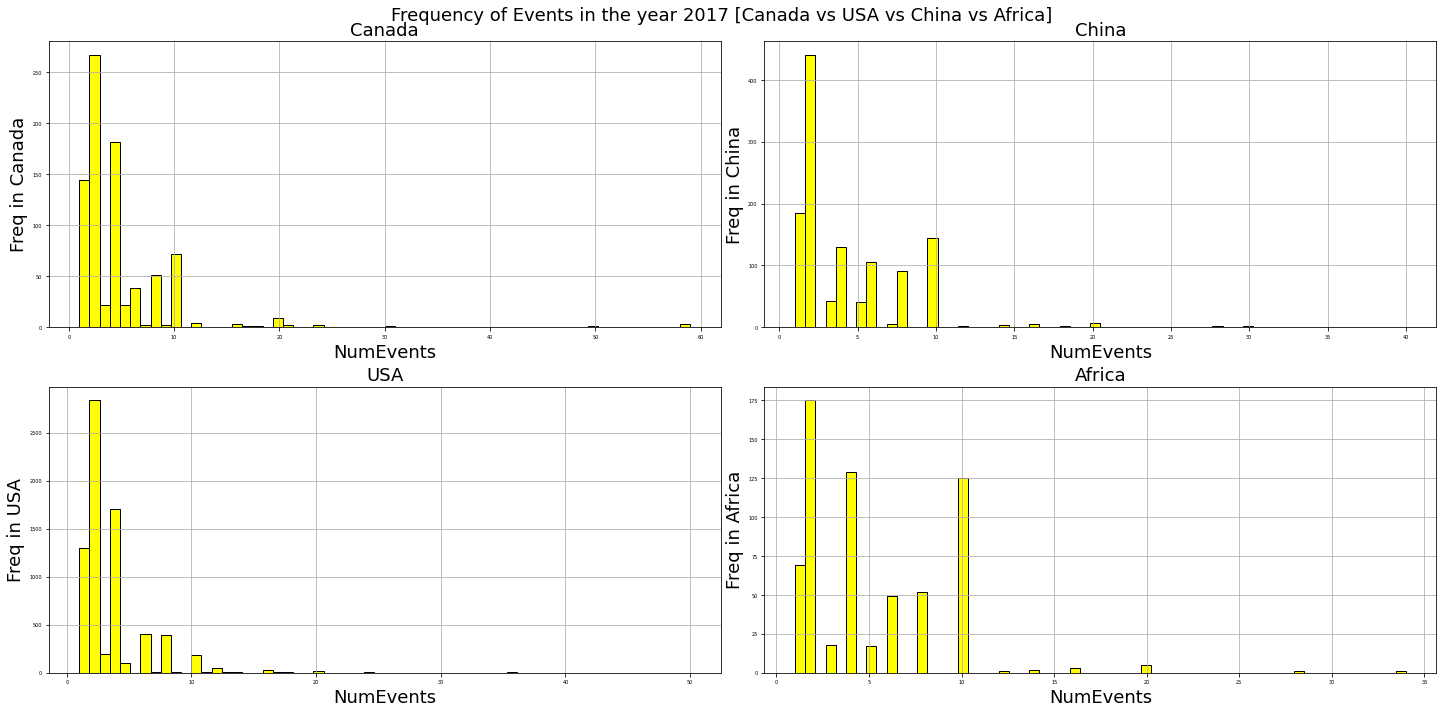

In [44]:
# Case study for year 2004 --> dataframe "n3"
#n3['Source']=='AFR'  n3['Source']=='AUS' | n3['Source']=='CHN' | n3['Source']=='EUR' | 
        #n3['Source']=='IND' | n3['Source']=='JPN' | n3['Source']=='RUS' | n3['Source']=='AFG' |

n1 = df0[df0['Actor1Name']=='CHINA'] # china
n2 = df0[df0['Actor1Name']=='UNITED STATES'] # usa
n3 = df0[df0['Actor1Name']=='CANADA'] # canada
n4 = df0[df0['Actor1Name']=='AFRICA'] # africa

'''
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20,5))
fig.suptitle('Frequency of Events in the year 2004 [Canada vs USA vs China vs Africa]')


ax1.hist(n3['NumEvents'], bins=60, edgecolor="black", color="yellow") 
ax1.set(xlabel='NumEvents', ylabel='Freq in Canada')
ax1.set_title('Canada')
ax1.grid()

ax2.hist(n2['NumEvents'], bins=60, edgecolor="black", color="yellow")
ax2.set(xlabel='NumEvents', ylabel='Freq in USA')
ax2.set_title('USA')
ax2.grid()

ax3.hist(n1['NumEvents'], bins=60, edgecolor="black", color="yellow")
ax3.set(xlabel='NumEvents', ylabel='Freq in China')
ax3.set_title('China')
ax3.grid()

ax4.hist(n4['NumEvents'], bins=60, edgecolor="black", color="yellow")
ax4.set(xlabel='NumEvents', ylabel='Freq in Africa')
ax4.set_title('Africa')
ax4.grid()
'''

fig, axs = plt.subplots(2, 2, figsize=(20,10))
fig.suptitle('Frequency of Events in the year 2017 [Canada vs USA vs China vs Africa]',  fontsize=18)


axs[0,0].hist(n3['NumMentions'], bins=60, edgecolor="black", color="yellow")
axs[0,0].set_xlabel('NumEvents', fontsize=18)
axs[0,0].set_ylabel('Freq in Canada',  fontsize=18)
axs[0,0].set_title('Canada',  fontsize=18)
axs[0,0].grid()

axs[1,0].hist(n2['NumMentions'], bins=60, edgecolor="black", color="yellow")
axs[1,0].set_xlabel('NumEvents',  fontsize=18)
axs[1,0].set_ylabel('Freq in USA',  fontsize=18)
axs[1,0].set_title('USA',  fontsize=18)
axs[1,0].grid()
#axs[1, 0].sharex(axs[0, 0])

axs[0,1].hist(n1['NumMentions'], bins=60, edgecolor="black", color="yellow")
axs[0,1].set_xlabel('NumEvents',  fontsize=18)
axs[0,1].set_ylabel('Freq in China',  fontsize=18)
axs[0,1].set_title('China',  fontsize=18)
axs[0,1].grid()

axs[1, 1].hist(n4['NumMentions'], bins=60, edgecolor="black", color="yellow")
axs[1,1].set_xlabel('NumEvents', fontsize=18)
axs[1,1].set_ylabel('Freq in Africa',  fontsize=18)
axs[1,1].set_title('Africa',  fontsize=18)
axs[1,1].grid()

fig.tight_layout()

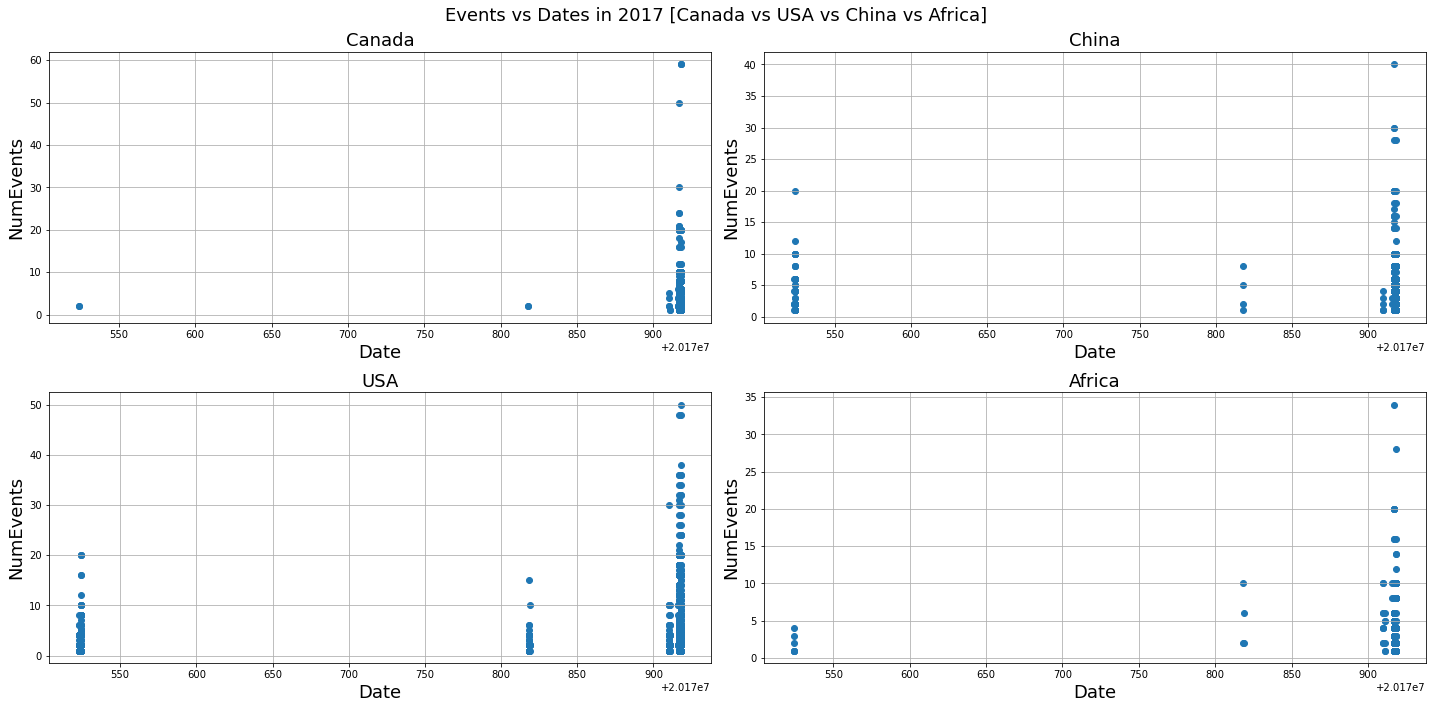

In [35]:
fig, axs = plt.subplots(2, 2, figsize=(20,10))
fig.suptitle('Events vs Dates in 2017 [Canada vs USA vs China vs Africa]',  fontsize=18)


axs[0,0].scatter(x=n3['SQLDATE'], y=n3['NumMentions']) 
axs[0,0].set_ylabel('NumEvents', fontsize=18)
axs[0,0].set_xlabel('Date',  fontsize=18)
axs[0,0].set_title('Canada',  fontsize=18)
axs[0,0].grid()

axs[1,0].scatter(x=n2['SQLDATE'], y=n2['NumMentions']) 
axs[1,0].set_ylabel('NumEvents',  fontsize=18)
axs[1,0].set_xlabel('Date',  fontsize=18)
axs[1,0].set_title('USA',  fontsize=18)
axs[1,0].grid()
#axs[1, 0].sharex(axs[0, 0])

axs[0,1].scatter(x=n1['SQLDATE'], y=n1['NumMentions']) 
axs[0,1].set_ylabel('NumEvents',  fontsize=18)
axs[0,1].set_xlabel('Date',  fontsize=18)
axs[0,1].set_title('China',  fontsize=18)
axs[0,1].grid()

axs[1, 1].scatter(x=n4['SQLDATE'], y=n4['NumMentions']) 
axs[1,1].set_xlabel('Date', fontsize=18)
axs[1,1].set_ylabel('NumEvents',  fontsize=18)
axs[1,1].set_title('Africa',  fontsize=18)
axs[1,1].grid()

fig.tight_layout()

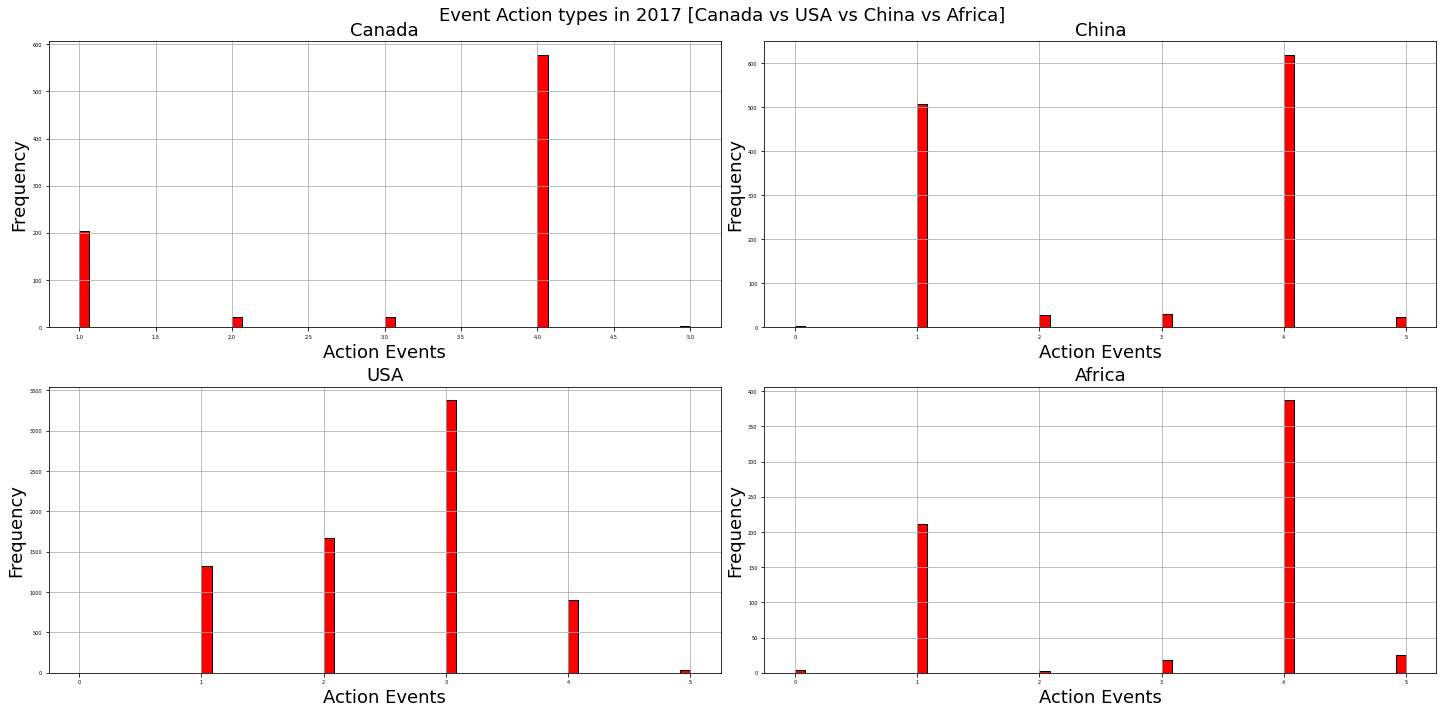

In [45]:
fig, axs = plt.subplots(2, 2, figsize=(20,10))
fig.suptitle('Event Action types in 2017 [Canada vs USA vs China vs Africa]',  fontsize=18)


axs[0,0].hist(n3['ActionGeo_Type'], bins=60, edgecolor="black", color="red") 
axs[0,0].set_xlabel('Action Events', fontsize=18)
axs[0,0].set_ylabel('Frequency',  fontsize=18)
axs[0,0].set_title('Canada',  fontsize=18)
axs[0,0].grid()

axs[1,0].hist(n2['ActionGeo_Type'], bins=60, edgecolor="black", color="red")
axs[1,0].set_xlabel('Action Events',  fontsize=18)
axs[1,0].set_ylabel('Frequency',  fontsize=18)
axs[1,0].set_title('USA',  fontsize=18)
axs[1,0].grid()
#axs[1, 0].sharex(axs[0, 0])

axs[0,1].hist(n1['ActionGeo_Type'], bins=60, edgecolor="black", color="red") 
axs[0,1].set_xlabel('Action Events',  fontsize=18)
axs[0,1].set_ylabel('Frequency',  fontsize=18)
axs[0,1].set_title('China',  fontsize=18)
axs[0,1].grid()

axs[1, 1].hist(n4['ActionGeo_Type'], bins=60, edgecolor="black", color="red")
axs[1,1].set_xlabel('Action Events', fontsize=18)
axs[1,1].set_ylabel('Frequency',  fontsize=18)
axs[1,1].set_title('Africa',  fontsize=18)
axs[1,1].grid()

fig.tight_layout()

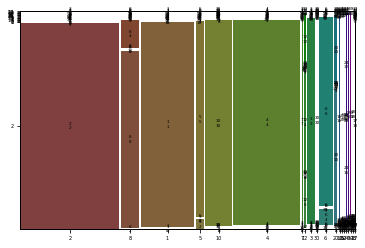

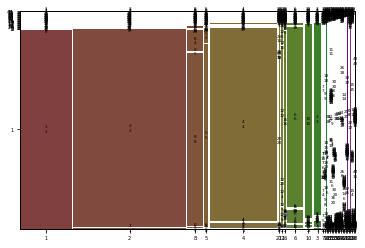

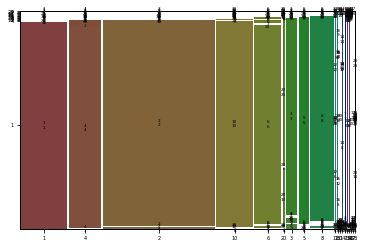

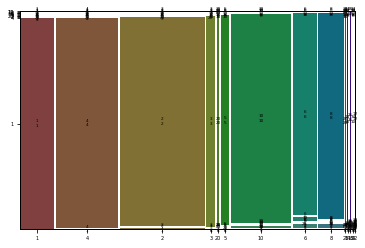

In [43]:
from statsmodels.graphics.mosaicplot import mosaic
# red, brown -> serious incidents, 
# green, blue -> regular events 
plt.rcParams['font.size'] = 5.0
mosaic(n3, ['NumMentions', 'NumArticles']); # Canada
mosaic(n2, ['NumMentions', 'NumArticles']); # USA
mosaic(n1, ['NumMentions', 'NumArticles']); # China
mosaic(n4, ['NumMentions', 'NumArticles']); # Africa

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

In [2]:
food1 = pd.read_csv('Datasets/world-food-prices-1.csv')

In [3]:
food1 = food1.loc[food1['Year']>1999] #Food prices after 1999
food1.head(10)

,Country,mkt_id,Market,CommodityGroup,Commodity,Year,Month,PriceTrend,PEWI,ALPS,UnitOfMeasure,PriceType,Currency,sn
0,Afghanistan,266,Fayzabad,cereals and tubers,Wheat,2003,1,5.686563,1.603030,Alert,KG,Retail,AFN,1_266_84_15_5_87
1,Afghanistan,267,Mazar,cereals and tubers,Wheat,2003,1,5.714583,2.713668,Crisis,KG,Retail,AFN,1_267_84_15_5_87
2,Afghanistan,270,Hirat,cereals and tubers,Wheat,2003,1,5.758125,0.357086,Stress,KG,Retail,AFN,1_270_84_15_5_87
3,Afghanistan,271,Kabul,cereals and tubers,Wheat,2003,1,6.407604,0.716034,Stress,KG,Retail,AFN,1_271_84_15_5_87
4,Afghanistan,272,Kandahar,cereals and tubers,Wheat,2003,1,8.323438,-0.842860,Normal,KG,Retail,AFN,1_272_84_15_5_87
5,Afghanistan,273,Jalalabad,cereals and tubers,Wheat,2003,1,8.126875,-1.204661,Normal,KG,Retail,AFN,1_273_84_15_5_87
6,Afghanistan,266,Fayzabad,cereals and tubers,Wheat,2004,1,8.150000,-2.563018,Normal,KG,Retail,AFN,1_266_84_15_5_87
7,Afghanistan,267,Mazar,cereals and tubers,Wheat,2004,1,7.100000,-1.688895,Normal,KG,Retail,AFN,1_267_84_15_5_87
8,Afghanistan,270,Hirat,cereals and tubers,Wheat,2004,1,8.125000,-0.996519,Normal,KG,Retail,AFN,1_270_84_15_5_87
9,Afghanistan,271,Kabul,cereals and tubers,Wheat,2004,1,9.116667,-1.289289,Normal,KG,Retail,AFN,1_271_84_15_5_87


Text(0.5, 1.0, 'Food Commodity in the world')

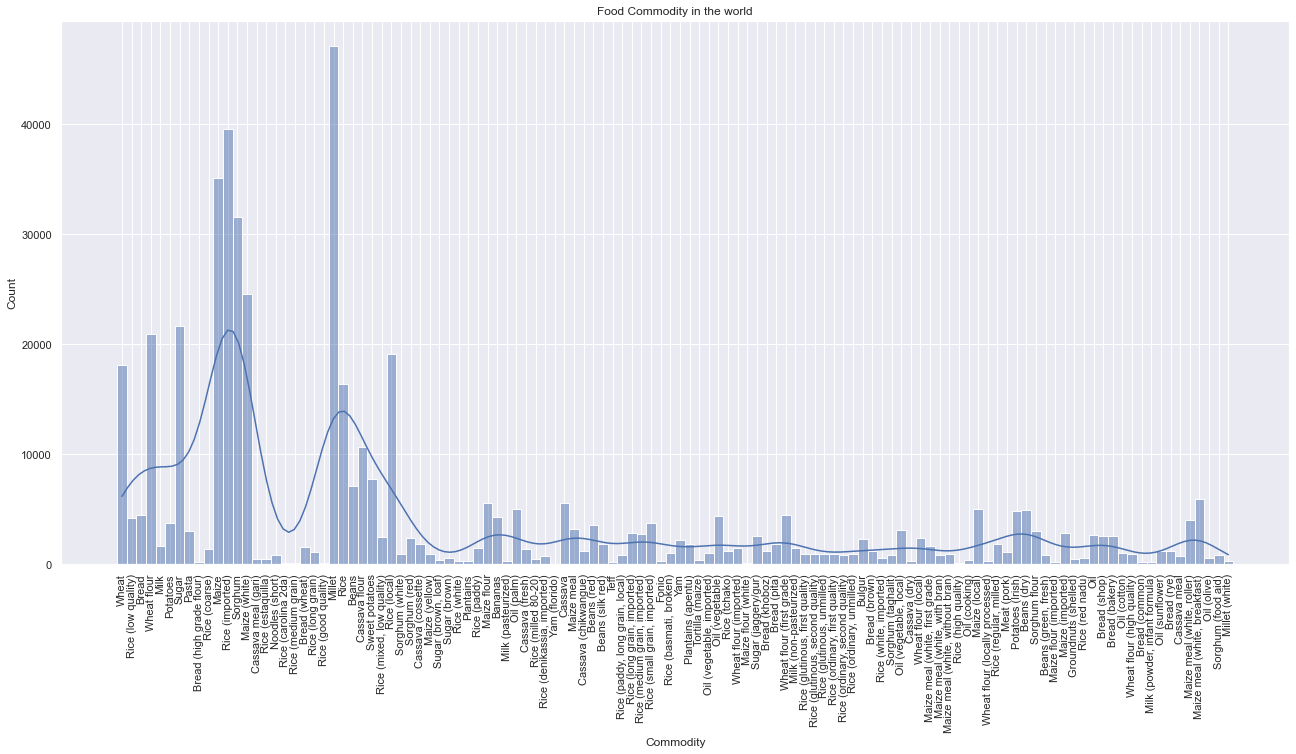

In [19]:
plt.figure(figsize=(22,10)) 
plt.xticks(rotation=90)
sns.histplot(data=food1, x=food1['Commodity'], kde=True)
plt.title('Food Commodity in the world')

Text(0.5, 1.0, 'Global food Price Trend (per 100kg)')

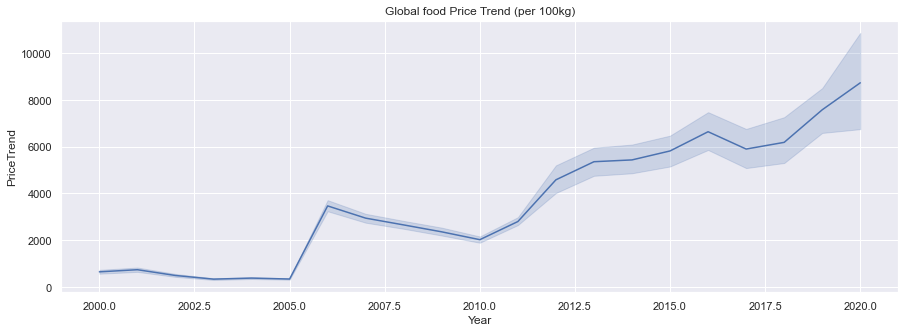

In [15]:
plt.figure(figsize=(15,5)) 
sns.set(style='darkgrid')
sns.lineplot(x=food1['Year'], y=food1['PriceTrend'], data=food1)
plt.title('Global food Price Trend (per 100kg)')

Text(0.5, 1.0, 'Country-wise food market')

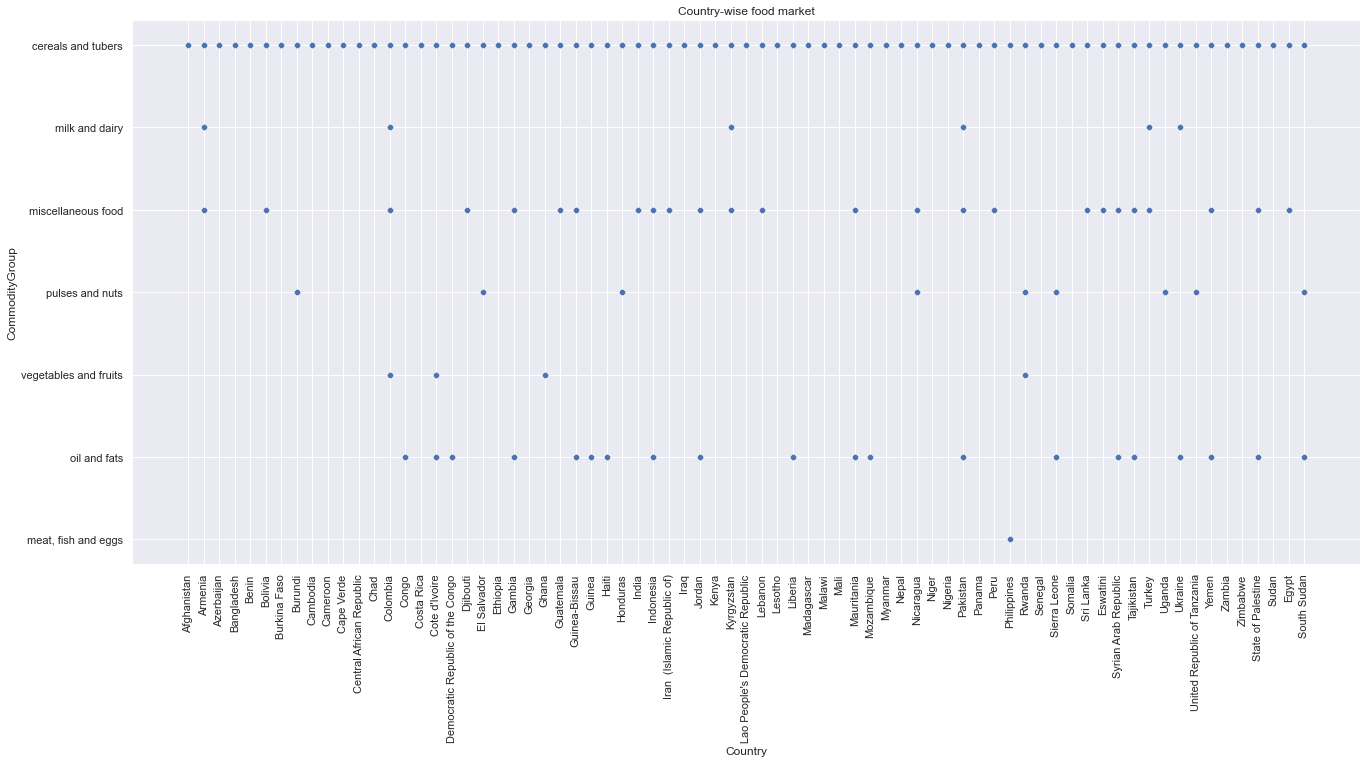

In [21]:
plt.figure(figsize=(22,10)) 
plt.xticks(rotation=90)
sns.scatterplot(data=food1, x=food1['Country'], y=food1['CommodityGroup'])
plt.title('Country-wise food market')

In [82]:
arm = pd.read_csv('Datasets/Armed Conflict/armed.csv')  #armed conflict in the world

In [83]:
arm['start_date2'] = arm['start_date2'].str[:4] #to get only the year
arm['side_a_id'] = arm['side_a_id'].str[:3]

In [84]:
arm['start_date2'] = pd.to_numeric(arm['start_date2'], errors='coerce')
arm['side_a_id'] = pd.to_numeric(arm['side_a_id'], errors='coerce')
arm = arm[arm['start_date2']>1999]
arm.head(10)

,dyad_id,conflict_id,location,side_a,side_a_id,side_a_2nd,side_b,side_b_id,side_b_2nd,incompatibility,...,start_prec,start_date2,start_prec2,gwno_a,gwno_a_2nd,gwno_b,gwno_b_2nd,gwno_loc,region,version
0,11971,11342,India,Government of India,141,NaN,GNLA,1163,NaN,1,...,1,2012,1,750,NaN,NaN,NaN,750,3,20.1
1,11971,11342,India,Government of India,141,NaN,GNLA,1163,NaN,1,...,1,2014,1,750,NaN,NaN,NaN,750,3,20.1
6,11977,11344,Sudan,Government of Sudan,112,NaN,Republic of South Sudan,1129,NaN,1,...,1,2011,1,625,NaN,NaN,NaN,625,4,20.1
7,11805,11345,South Sudan,Government of South Sudan,113,NaN,SSDM/A - Cobra Faction,3563,NaN,2,...,1,2013,1,626,NaN,NaN,NaN,626,4,20.1
8,11978,11345,South Sudan,Government of South Sudan,113,NaN,SSDM/A,1108,NaN,2,...,2,2011,2,626,NaN,NaN,NaN,626,4,20.1
9,11979,11345,South Sudan,Government of South Sudan,113,NaN,SSLM/A,1124,NaN,2,...,1,2011,1,626,NaN,NaN,NaN,626,4,20.1
10,11979,11345,South Sudan,Government of South Sudan,113,NaN,SSLM/A,1124,NaN,2,...,1,2011,1,626,NaN,NaN,NaN,626,4,20.1
11,12413,11345,South Sudan,Government of South Sudan,113,NaN,SPLM/A - IO,4226,NaN,2,...,1,2013,1,626,NaN,NaN,NaN,626,4,20.1
12,12413,11345,South Sudan,Government of South Sudan,113,Government of Uganda,SPLM/A - IO,4226,NaN,2,...,1,2013,1,626,500,NaN,NaN,626,4,20.1
13,12413,11345,South Sudan,Government of South Sudan,113,Government of Uganda,SPLM/A - IO,4226,NaN,2,...,1,2013,1,626,500,NaN,NaN,626,4,20.1


Text(0.5, 1.0, 'Armed Conflict Regions')

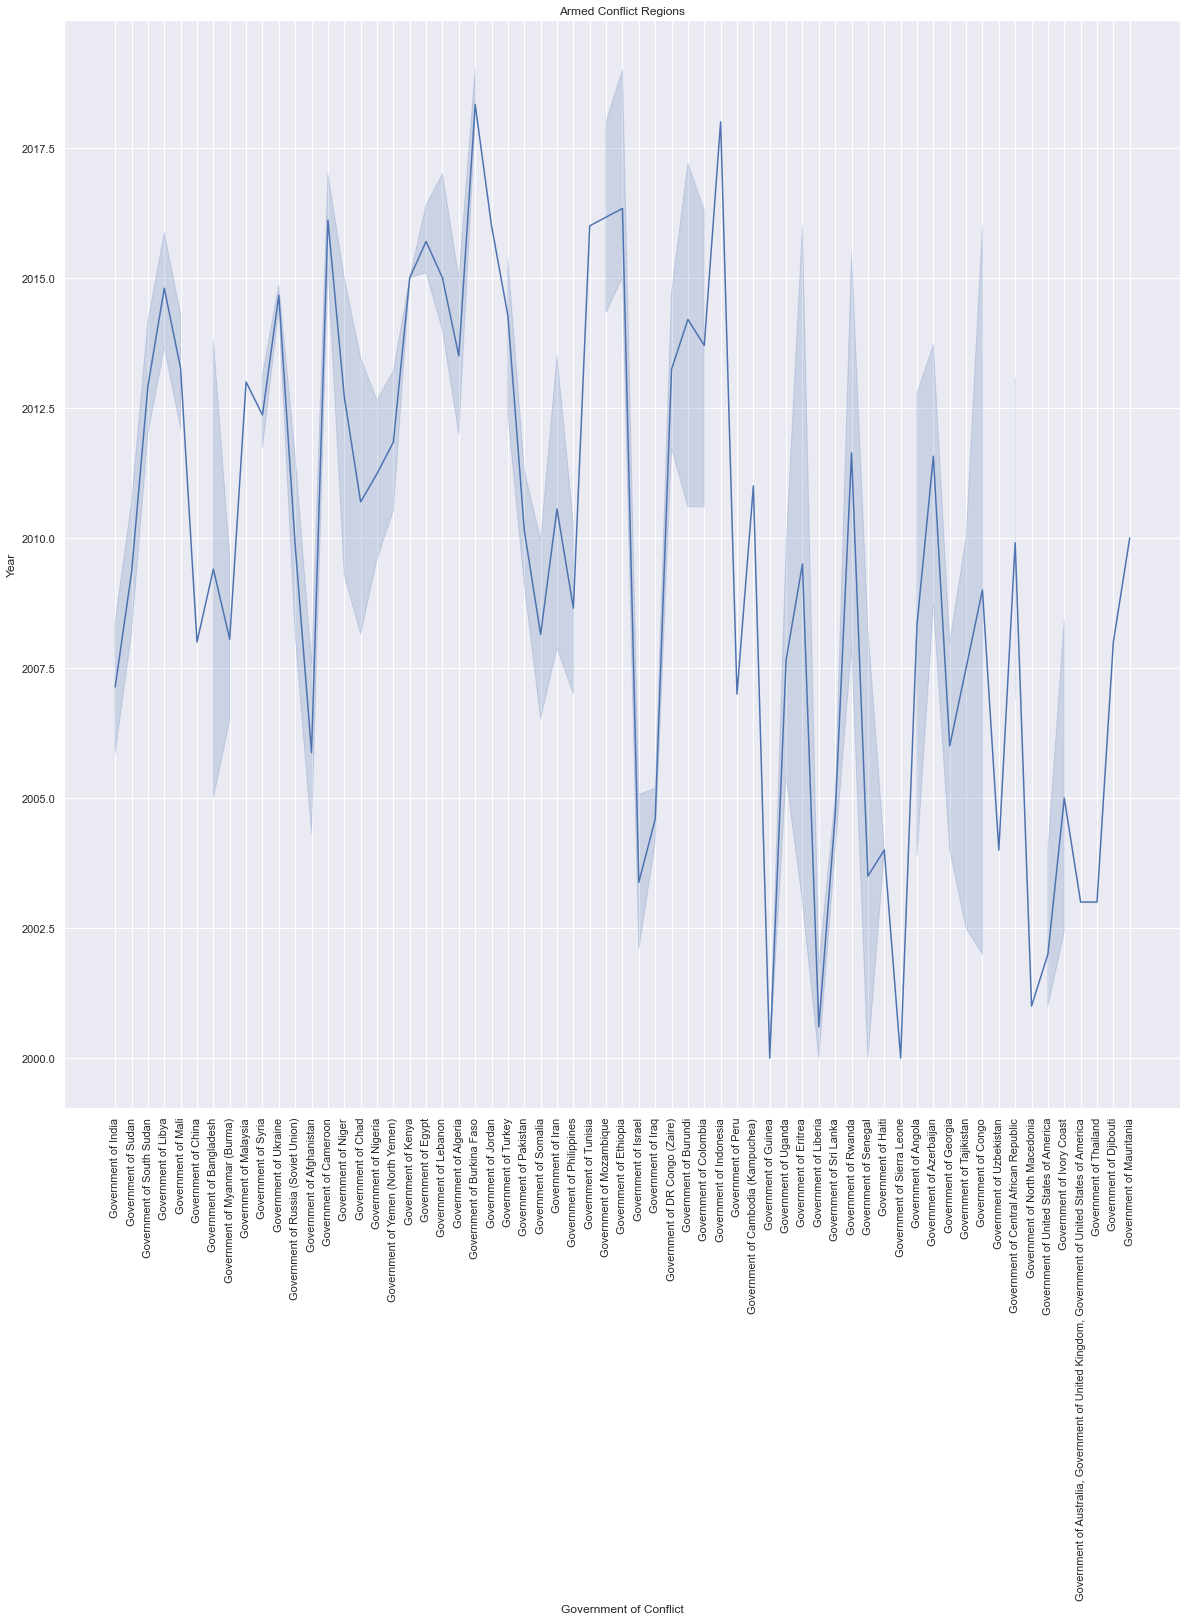

In [89]:
plt.figure(figsize=(20,20)) 
sns.set(style='darkgrid')
plt.xticks(rotation=90)
plt.xlabel('Government of Conflict')
plt.ylabel('Year')
sns.lineplot(x=arm['side_a'], y=arm['start_date2'], data=arm)
plt.title('Armed Conflict Regions')

In [77]:
df = pd.DataFrame()
df['Country_ID'] = arm['side_a_id']
df['Date'] = arm['start_date2']
df.dropna()
df

,Country_ID,Date
0,141,2012
1,141,2014
6,112,2011
7,113,2013
8,113,2011
...,...,...
3057,144,2014
3058,144,2014
3059,144,2017
3070,74,2010


In [97]:
k = pd.crosstab(index=df['Country_ID'],columns=df['Date'])

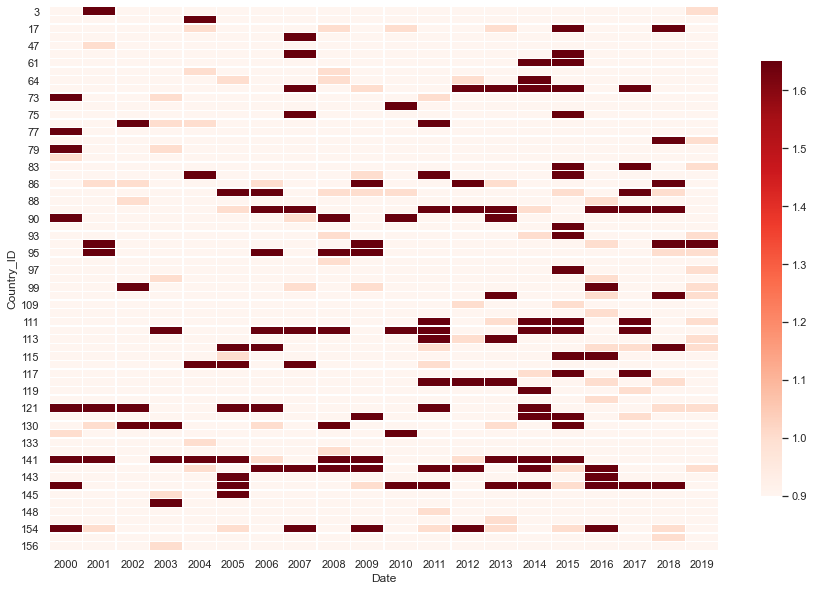

In [103]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(k, cmap="Reds", vmin= 0.9, vmax=1.65,
           linewidth=0.3, cbar_kws={"shrink": .8})
plt.show()
# darker shows higher armed conflicts

In [133]:
crime = pd.read_csv('Datasets/Crime Rates/crime.csv') 
crime.head(5)

,Year,Aruba,Afghanistan,Angola,Albania,Andorra,Arab World,United Arab Emirates,Argentina,Armenia,...,Virgin Islands (U.S.),Vietnam,Vanuatu,World,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
0,2000,NaN,NaN,NaN,4.186312,NaN,NaN,NaN,NaN,2.964559,...,21.153316,NaN,NaN,6.800439,NaN,NaN,4.003660,47.6,7.651732,NaN
1,2001,4.306076,NaN,NaN,7.029425,NaN,NaN,NaN,8.394221,2.884597,...,25.761577,1.243459,NaN,6.893991,NaN,NaN,NaN,46.1,NaN,12.822979
2,2002,5.263601,NaN,NaN,6.909384,NaN,NaN,NaN,9.474084,2.274243,...,37.768525,1.308650,NaN,6.870942,NaN,NaN,NaN,45.8,NaN,13.576713
3,2003,4.123031,NaN,NaN,5.323897,NaN,NaN,1.212307,7.789882,2.518276,...,28.609927,1.286730,NaN,6.708258,NaN,NaN,3.708190,41.6,NaN,11.350151
4,2004,2.025440,NaN,NaN,4.219147,1.311579,NaN,0.663623,6.073994,2.766007,...,34.227567,1.279754,NaN,6.493284,NaN,NaN,3.306023,39.0,NaN,11.281282


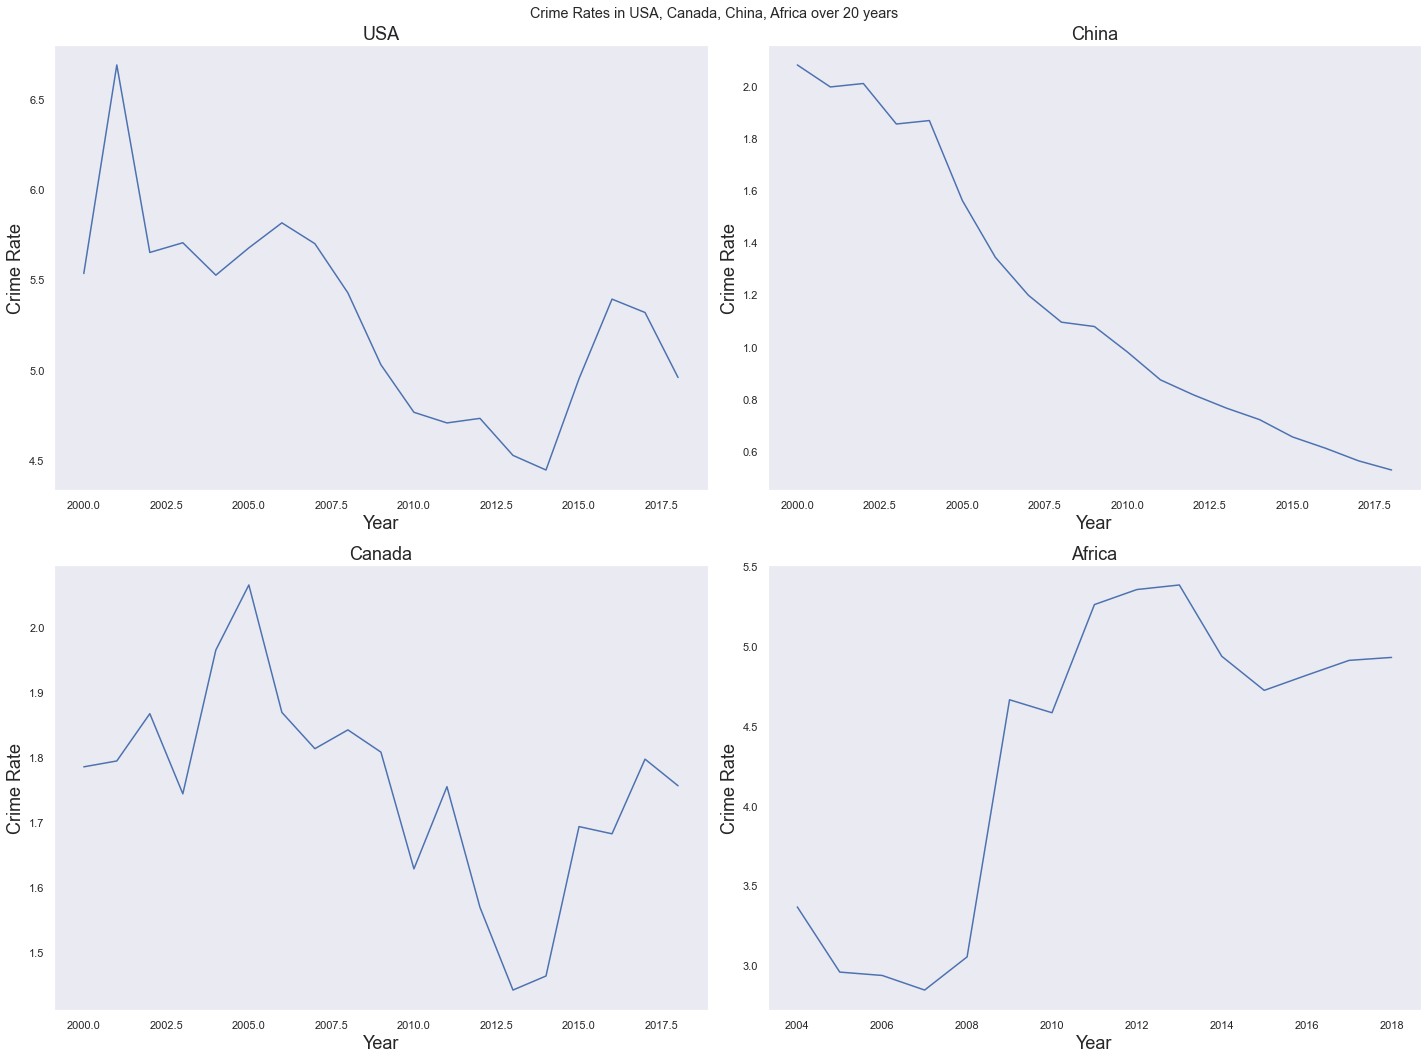

In [143]:
import matplotlib.pyplot as plt
n3 = crime
fig, axs = plt.subplots(2, 2, figsize=(20,15))
fig.suptitle('Crime Rates in USA, Canada, China, Africa over 20 years')

axs[0,0].plot(n3['Year'], n3['United States']) 
axs[0,0].set_ylabel('Crime Rate', fontsize=18)
axs[0,0].set_xlabel('Year',  fontsize=18)
axs[0,0].set_title('USA',  fontsize=18)
axs[0,0].grid()

axs[1,0].plot(n3['Year'], n3['Canada']) 
axs[1,0].set_ylabel('Crime Rate',  fontsize=18)
axs[1,0].set_xlabel('Year',  fontsize=18)
axs[1,0].set_title('Canada',  fontsize=18)
axs[1,0].grid() 

axs[0,1].plot(n3['Year'], n3['China']) 
axs[0,1].set_ylabel('Crime Rate',  fontsize=18)
axs[0,1].set_xlabel('Year',  fontsize=18)
axs[0,1].set_title('China',  fontsize=18)
axs[0,1].grid()

axs[1, 1].plot(n3['Year'], n3['Kenya']) 
axs[1,1].set_xlabel('Year', fontsize=18)
axs[1,1].set_ylabel('Crime Rate',  fontsize=18)
axs[1,1].set_title('Africa',  fontsize=18)
axs[1,1].grid()

fig.tight_layout()

In [153]:
gdp = pd.read_csv('Datasets/gdp GLOBAL/gdp.csv')

In [154]:
gdp.head(5)

,Year,Aruba,Afghanistan,Angola,Albania,Andorra,Arab World,United Arab Emirates,Argentina,Armenia,...,Virgin Islands (U.S.),Vietnam,Vanuatu,World,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
0,2000,NaN,NaN,5.632620e+11,7.407170e+11,NaN,NaN,NaN,4.777830e+11,1.818850e+12,...,NaN,1.100000e+15,NaN,NaN,NaN,NaN,NaN,1.782360e+12,4.743585e+10,1.808635e+10
1,2001,NaN,NaN,5.881030e+11,8.058620e+11,NaN,NaN,6.929540e+11,4.565490e+11,2.003690e+12,...,NaN,1.180000e+15,NaN,NaN,NaN,NaN,NaN,1.836430e+12,5.048798e+10,1.798714e+10
2,2002,NaN,NaN,6.653850e+11,8.403870e+11,NaN,NaN,7.192120e+11,3.978540e+11,2.285820e+12,...,3.269000e+09,1.230000e+15,NaN,NaN,1.627165e+09,NaN,NaN,1.921630e+12,5.293358e+10,1.655017e+10
3,2003,NaN,NaN,6.959520e+11,8.824000e+11,NaN,NaN,7.779080e+11,4.407120e+11,2.616040e+12,...,3.294110e+09,1.290000e+15,NaN,NaN,NaN,NaN,NaN,2.004500e+12,5.485434e+10,1.355873e+10
4,2004,NaN,NaN,8.233120e+11,9.342940e+11,NaN,NaN,8.634920e+11,4.851150e+11,2.889480e+12,...,3.413454e+09,1.330000e+15,4.338380e+10,NaN,1.650014e+09,NaN,NaN,2.108310e+12,5.890643e+10,1.240142e+10


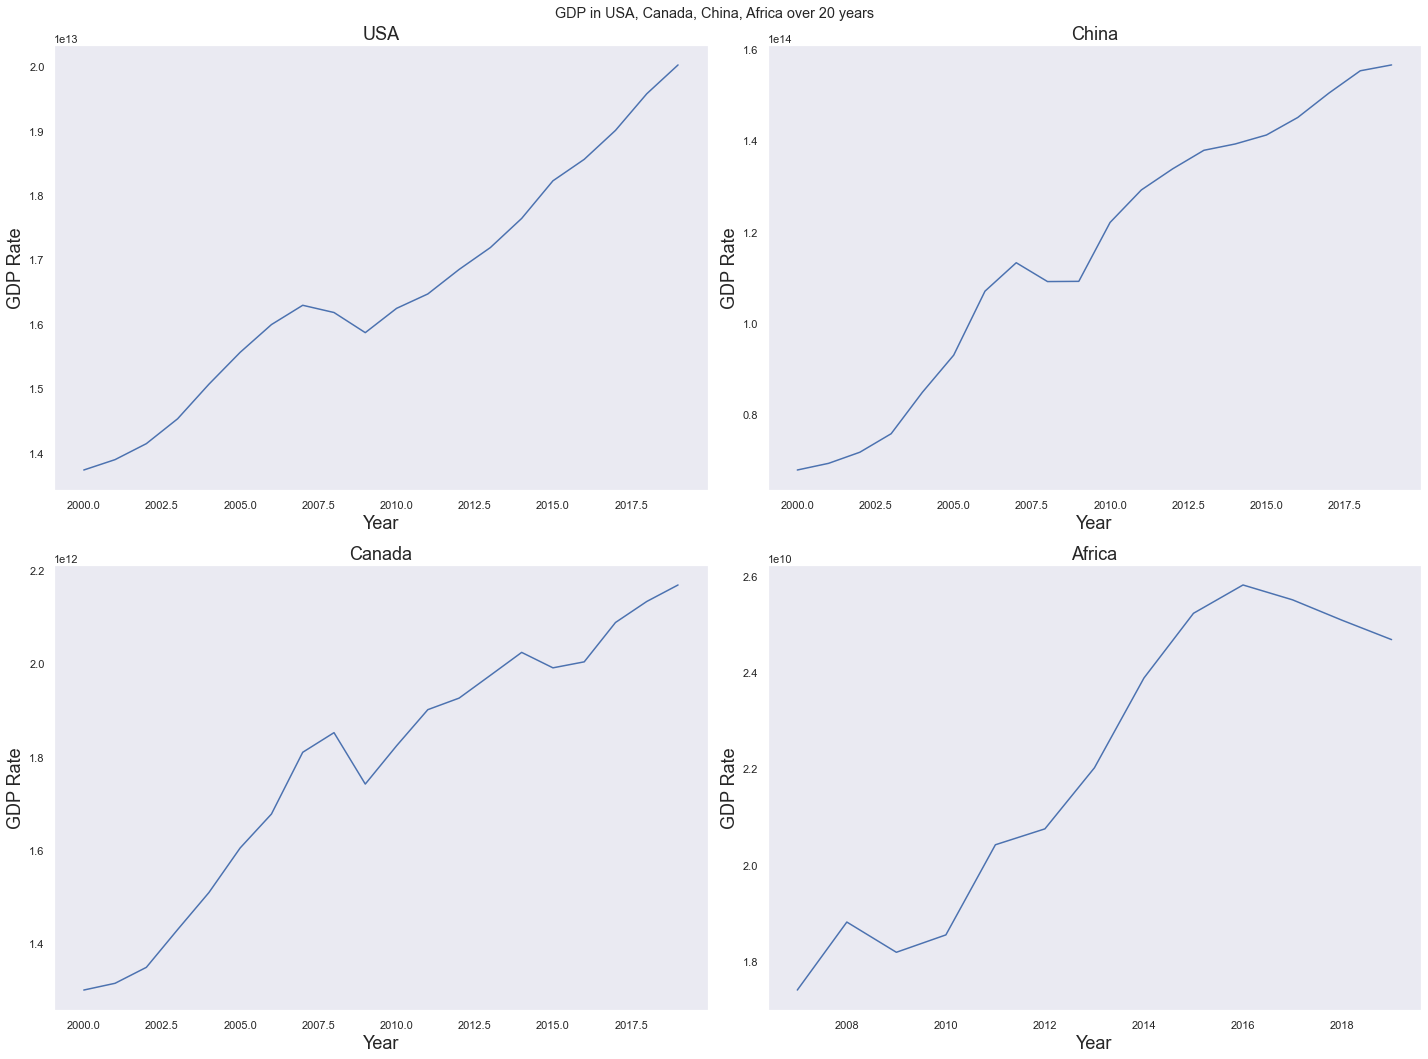

In [157]:
import matplotlib.pyplot as plt
n3 = gdp
fig, axs = plt.subplots(2, 2, figsize=(20,15))
fig.suptitle('GDP in USA, Canada, China, Africa over 20 years')

axs[0,0].plot(n3['Year'], n3['United States']) 
axs[0,0].set_ylabel('GDP Rate', fontsize=18)
axs[0,0].set_xlabel('Year',  fontsize=18)
axs[0,0].set_title('USA',  fontsize=18)
axs[0,0].grid()

axs[1,0].plot(n3['Year'], n3['Canada']) 
axs[1,0].set_ylabel('GDP Rate',  fontsize=18)
axs[1,0].set_xlabel('Year',  fontsize=18)
axs[1,0].set_title('Canada',  fontsize=18)
axs[1,0].grid() 

axs[0,1].plot(n3['Year'], n3['China']) 
axs[0,1].set_ylabel('GDP Rate',  fontsize=18)
axs[0,1].set_xlabel('Year',  fontsize=18)
axs[0,1].set_title('China',  fontsize=18)
axs[0,1].grid()

axs[1, 1].plot(n3['Year'], n3['Kenya']) 
axs[1,1].set_ylabel('GDP Rate', fontsize=18)
axs[1,1].set_xlabel('Year',  fontsize=18)
axs[1,1].set_title('Africa',  fontsize=18)
axs[1,1].grid()

fig.tight_layout()